In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the studentdataset
df = pd.read_csv('/Users/apple/Desktop/kaggle/Student_Performance.csv')
df_student = pd.read_csv('/Users/apple/Desktop/kaggle/Student_Performance.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/apple/Desktop/kaggle/Student_Performance.csv'

In [ ]:
#Display the few row and basic information of the dataframe
df_student.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


## Handling Missing Values


In [ ]:
df_student.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

## Exploratory Data Analysis(EDA)

Text(0.5, 1.0, 'Distribution of Performance Index')

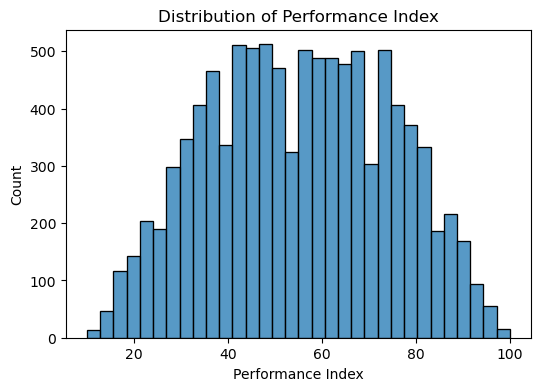

In [ ]:
#Distribution of PerfromanceIndex
plt.figure(figsize=(6,4))
sns.histplot(df_student['Performance Index'])
plt.title('Distribution of Performance Index')


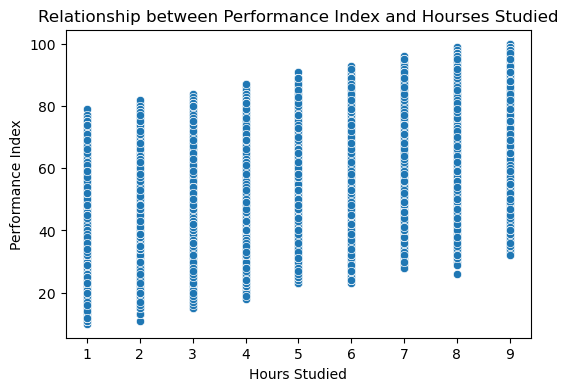

In [ ]:
#Relationship between Performance Index and Hourses Studied
plt.figure(figsize=(6,4))
sns.scatterplot(x="Hours Studied", y="Performance Index", data=df_student)  
plt.title('Relationship between Performance Index and Hourses Studied') 
plt.show()

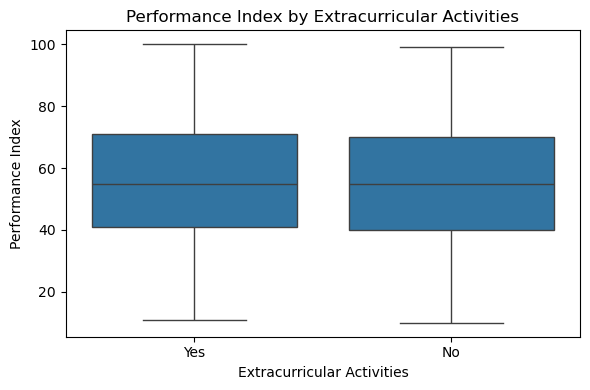

In [ ]:
#Box Plot for categorical variables
fig, ax = plt.subplots(figsize=(6,4))

sns.boxplot(
    x="Extracurricular Activities",   
    y="Performance Index",            
    data=df_student,
    ax=ax
)

ax.set_title('Performance Index by Extracurricular Activities')
ax.set_xlabel('Extracurricular Activities')
ax.set_ylabel('Performance Index')
plt.tight_layout()
plt.show()

In [ ]:
print(df_student['Extracurricular Activities'].unique())
print(df_student['Extracurricular Activities'].value_counts())


['Yes' 'No']
Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64


In [ ]:
df_student['Extra_Activity_Binary'] = df_student['Extracurricular Activities'].map({
    'Yes': 1,
    'No': 0
})



In [ ]:
df_student.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extra_Activity_Binary
0,7,99,Yes,9,1,91.0,1
1,4,82,No,4,2,65.0,0
2,8,51,Yes,7,2,45.0,1
3,5,52,Yes,5,2,36.0,1
4,7,75,No,8,5,66.0,0


## Preparing for Model


In [ ]:
df_model = df_student.drop(columns=['Extracurricular Activities'])


In [ ]:
X = df_model.drop(columns=['Performance Index'])
y = df_model['Performance Index']

In [ ]:
X = df_model.drop('Performance Index', axis=1)
y = df_model['Performance Index']

print("Features:", X.columns)
print("Target variable:", y.name)

Features: Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Extra_Activity_Binary'],
      dtype='object')
Target variable: Performance Index


In [ ]:
#Calculate corrolations
corr_matrix = df_model.corr()

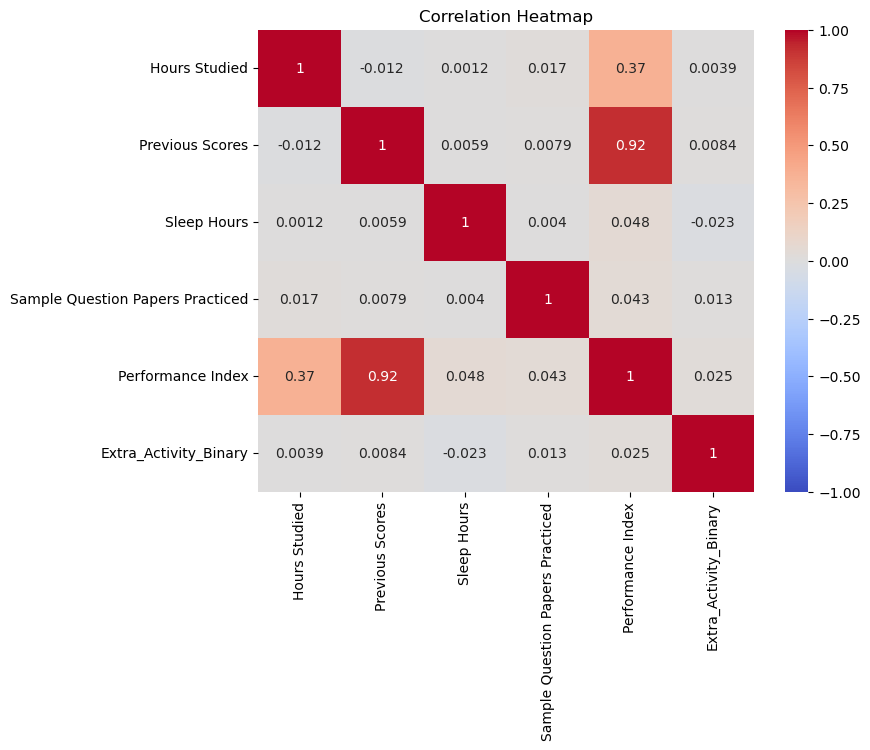

In [ ]:
# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Print correlations with 'Performance Index'
corr_matrix['Performance Index'].sort_values(ascending=False)

Performance Index                   1.000000
Previous Scores                     0.915189
Hours Studied                       0.373730
Sleep Hours                         0.048106
Sample Question Papers Practiced    0.043268
Extra_Activity_Binary               0.024525
Name: Performance Index, dtype: float64

## Visualizing RelationShip


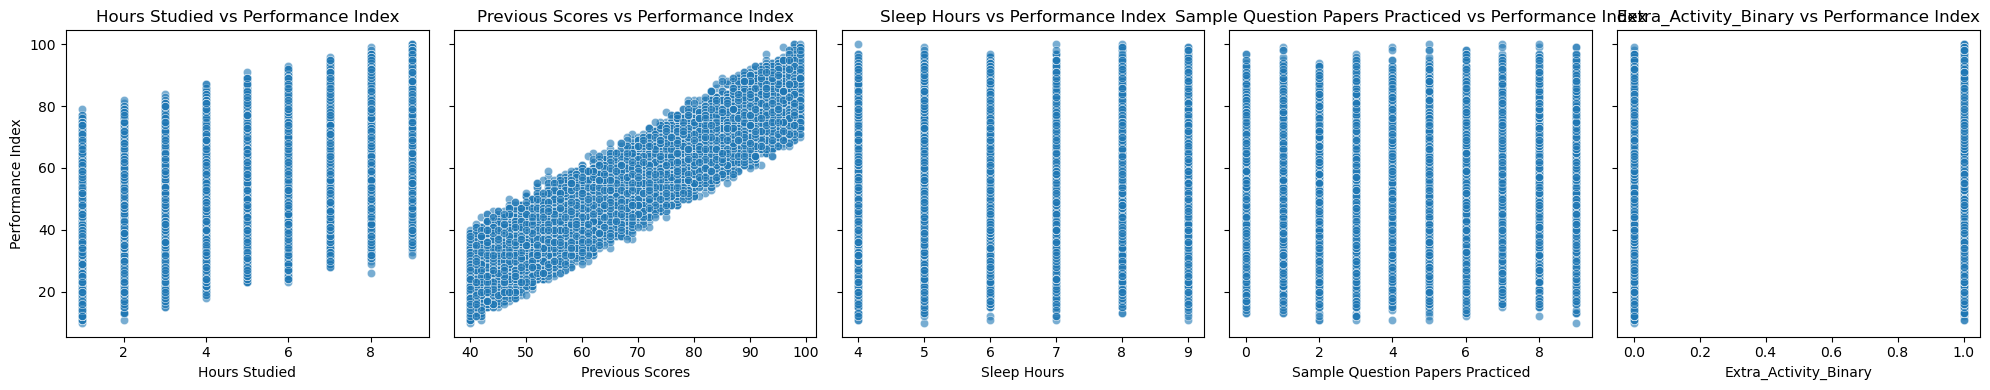

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# لیست ویژگی‌های عددی (به جز هدف)
numerical_features = [
    'Hours Studied',
    'Previous Scores',
    'Sleep Hours',
    'Sample Question Papers Practiced',
    'Extra_Activity_Binary'
]

# یک ردیف با 5 ستون برای subplots بسازیم
fig, axes = plt.subplots(
    1,
    len(numerical_features),
    figsize=(20, 4),
    sharey=True          # محور y مشترک برای همه
)

# حلقه برای هر ویژگی
for ax, feature in zip(axes, numerical_features):
    sns.scatterplot(
        x=feature,
        y='Performance Index',
        data=df_model,
        ax=ax,
        alpha=0.6          # اگر نقطه‌ها زیادن کمی شفافیت بدهید
    )
    ax.set_title(f'{feature} vs Performance Index')
    ax.set_xlabel(feature)
    ax.set_ylabel('Performance Index')

plt.tight_layout()
plt.show()


## Selecting Intial Features

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# جداسازی X و y
X = df_model.drop(columns=['Performance Index'])
y = df_model['Performance Index']

# Selector برای 3 فیچر برتر
selector = SelectKBest(score_func=f_regression, k=3)
selector.fit(X, y)

# نمایش فیچرهای انتخاب‌شده
mask = selector.get_support()
selected_features = X.columns[mask].tolist()
print("Selected features:", selected_features)

# ساخت X جدید با فقط فیچرهای انتخاب‌شده
X_selected = X[selected_features]


Selected features: ['Hours Studied', 'Previous Scores', 'Sleep Hours']


## Feature Engineering

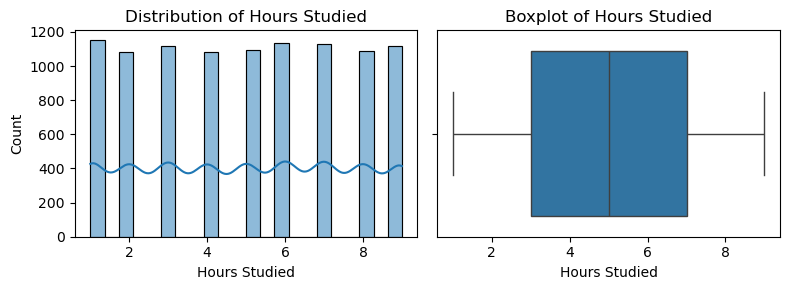

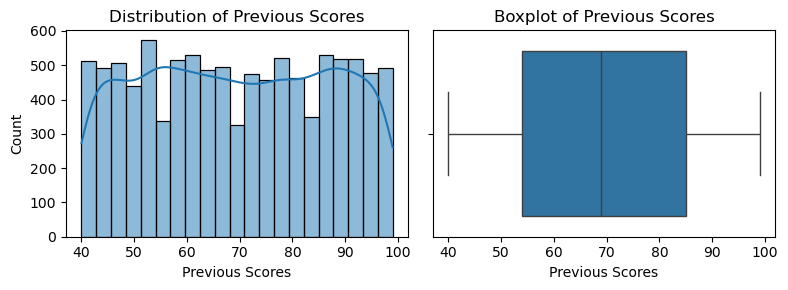

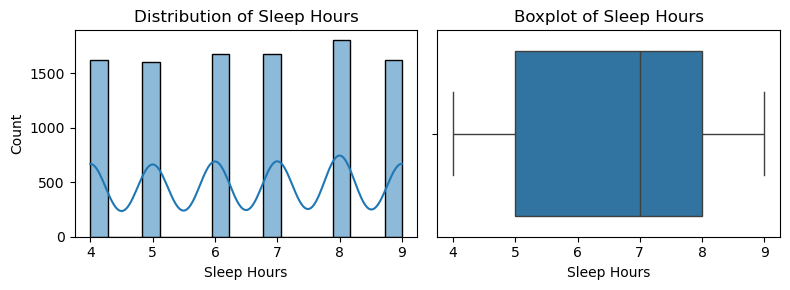

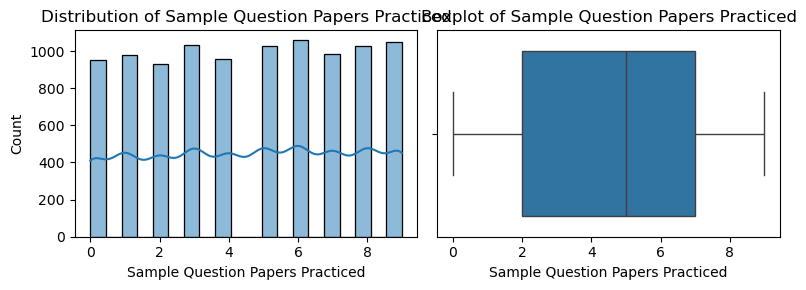

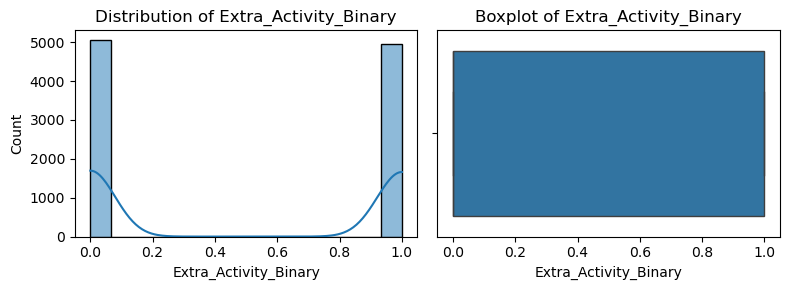

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_features:
    fig, ax = plt.subplots(1,2, figsize=(8,3))
    sns.histplot(df_model[col], ax=ax[0], kde=True)
    sns.boxplot(x=df_model[col], ax=ax[1])
    ax[0].set_title(f'Distribution of {col}')
    ax[1].set_title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


In [ ]:
import numpy as np
df_model['Papers_log'] = np.log1p(df_model['Sample Question Papers Practiced'])


In [ ]:
df_model['SleepBin'] = pd.cut(df_model['Sleep Hours'],
                              bins=[3,6,8,12],
                              labels=['Low','Normal','High'])


In [ ]:
df_model['papers_per_hour'] = (
    df_model['Sample Question Papers Practiced'] 
    / (df_model['Hours Studied'] + 1e-6)
)
df_model['score_per_hour'] = (
    df_model['Previous Scores'] 
    / (df_model['Hours Studied'] + 1e-6)
)


In [ ]:
df_model['studypaper_inter'] = (
    df_model['Hours Studied'] 
    * df_model['Sample Question Papers Practiced']
)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df_model[numerical_features])
poly_features = poly.get_feature_names_out(numerical_features)
df_poly = pd.DataFrame(X_poly, columns=poly_features)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

# --- 1. فانکشن فیچر انجینیری ---
def make_features(X):
    X = X.copy()
    X['papers_per_hour'] = X['Sample Question Papers Practiced'] / (X['Hours Studied'] + 1e-6)
    X['studypaper_inter'] = X['Hours Studied'] * X['Sample Question Papers Practiced']
    return X

# --- 2. تعریف لیست فیچرها ---
# این‌ها ستون‌های عددی اولیه هستند
num_feats = [
    'Hours Studied',
    'Previous Scores',
    'Sleep Hours',
    'Sample Question Papers Practiced',
    'Extra_Activity_Binary'
]

# اگر ستون دسته‌ای دیگری (مثلاً SleepBin) از قبل دارید، آنجا می‌آورید
# در این مثال فرض می‌کنیم نداریم و همه فیچرها عددی هستند:
cat_feats = []  

# --- 3. ساخت ColumnTransformer ---
# - scaler روی num_feats  
# - one-hot روی cat_feats (اگر داشتیم)
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_feats),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_feats)
], remainder='drop')

# --- 4. ساخت Pipeline نهایی ---
pipeline = Pipeline(steps=[
    # ابتدا فیچرهای ترکیبی را بساز
    ('feat_eng', FunctionTransformer(make_features)),
    # سپس ستون‌های عددی/دسته‌ای را پیش‌پردازش کن
    ('preproc', preprocessor),
    # و در نهایت مدل را آموزش بده
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# --- 5. آموزش مدل ---
X = df_model.drop(columns=['Performance Index'])
y = df_model['Performance Index']

pipeline.fit(X, y)


Pipeline(steps=[('feat_eng',
                 FunctionTransformer(func=<function make_features at 0x14161de40>)),
                ('preproc',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Hours Studied',
                                                   'Previous Scores',
                                                   'Sleep Hours',
                                                   'Sample Question Papers '
                                                   'Practiced',
                                                   'Extra_Activity_Binary']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [])])),
                ('model', RandomForestRegressor(random_state=42))])

In [ ]:
X

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extra_Activity_Binary,Papers_log,SleepBin,papers_per_hour,score_per_hour,studypaper_inter
0,7,99,9,1,1,0.693147,High,0.142857,14.142855,7
1,4,82,4,2,0,1.098612,Low,0.500000,20.499995,8
2,8,51,7,2,1,1.098612,Normal,0.250000,6.374999,16
3,5,52,5,2,1,1.098612,Low,0.400000,10.399998,10
4,7,75,8,5,0,1.791759,Normal,0.714286,10.714284,35
...,...,...,...,...,...,...,...,...,...,...
9995,1,49,4,2,1,1.098612,Low,1.999998,48.999951,2
9996,7,64,8,5,1,1.791759,Normal,0.714286,9.142856,35
9997,6,83,8,5,1,1.791759,Normal,0.833333,13.833331,30
9998,9,97,7,0,1,0.000000,Normal,0.000000,10.777777,0


In [ ]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

# 1. آماده‌سازی X و y
X = df_model.drop(columns=['Performance Index'])
y = df_model['Performance Index']

# 2. تقسیم به آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. چک کردن با assert
# - مجموع سطرهای train و test باید برابر سطرهای X اصلی باشه
assert X_train.shape[0] + X_test.shape[0] == X.shape[0], (
    "Training and testing sets do not match the original dataset size"
)

# - تعداد ستون‌ها در train و test باید برابر باشه
assert X_train.shape[1] == X_test.shape[1], (
    "Training and testing sets do not have the same number of features"
)

print("✅ Train/Test split is consistent with original data.")


✅ Train/Test split is consistent with original data.


## Multiple Linear Regression

In [ ]:
import numpy as np

# 1. آماده‌سازی ماتریس X و بردار y
#    فقط فیچر‌های نهایی که انتخاب و مهندسی‌شون کردید
X = df_model[['Hours Studied',
              'Previous Scores',
              'Sleep Hours',
              'Sample Question Papers Practiced',
              'Extra_Activity_Binary']].values
y = df_model['Performance Index'].values.reshape(-1, 1)

# 2. افزودن ستون bias (یک‌ها)
def add_bias_column(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

X_bias = add_bias_column(X)

# 3. محاسبه θ از طریق معادلهٔ بسته
#    θ = (XᵀX)^{-1} Xᵀ y
theta_best = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)

print("Learned parameters (including intercept):")
print(theta_best)
# theta_best[0] → عرض از مبدأ
# theta_best[1:] → ضرایب فیچرها

# 4. پیش‌بینی روی داده‌های جدید
X_new = np.array([[ 5,  80,  7,  10, 1]])  # مثال: Hours Studied=5, Previous=80,...
X_new_bias = add_bias_column(X_new)
y_pred = X_new_bias.dot(theta_best)
print("Predicted Performance Index:", y_pred)


Learned parameters (including intercept):
[[-34.07558809]
 [  2.85298205]
 [  1.01843419]
 [  0.48055975]
 [  0.19380214]
 [  0.61289758]]
Predicted Performance Index: [[67.57889483]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 0. حذف ستون غیرعددی
df_model = df_model.drop(columns=['SleepBin'])

# 1. بررسی ستون‌ها
print(df_model.dtypes)

# 2. جداسازی X و y
X = df_model.drop(columns=['Performance Index'])
y = df_model['Performance Index']

# 3. تقسیم به train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. فیت کردن مدل
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 5. ارزیابی
y_pred = lr_model.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R²:  {r2_score(y_test, y_pred):.4f}")


Hours Studied                         int64
Previous Scores                       int64
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
Extra_Activity_Binary                 int64
Papers_log                          float64
papers_per_hour                     float64
score_per_hour                      float64
studypaper_inter                      int64
dtype: object
MSE: 4.0774
R²:  0.9890


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extra_Activity_Binary,papers_per_hour,score_per_hour,studypaper_inter
6252,0.043461,-0.540908,0.541427,-0.0,-0.0,-0.0,0.071043,-0.456718
4684,-7.740534,-23.970047,-0.943588,0.0,0.0,0.0,-0.006748,-0.247702
1731,5.232790,-13.783465,0.170173,0.0,0.0,-0.0,0.120085,0.414184
4742,2.638125,-28.044680,0.541427,0.0,0.0,-0.0,0.128541,0.240003
4521,5.232790,-16.839440,-0.943588,0.0,-0.0,-0.0,0.123709,0.658036


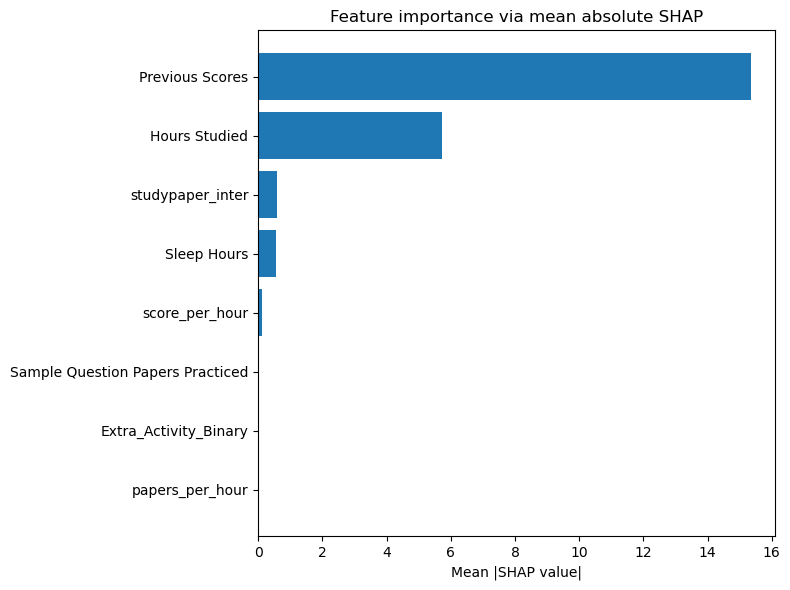

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

# 1. آماده‌سازی داده‌ها (مثلاً در یک سلول قبلی df_model را ساخته‌اید):
#    df_model = …  # دیتافریم نهایی شما

# 2. حذف فیچر ‘Papers_log’ و جداسازی X و y
df_lm = df_model.drop(columns=['Papers_log'])
X = df_lm.drop(columns=['Performance Index'])
y = df_lm['Performance Index']

# 3. تقسیم به آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. آموزش LassoCV برای کاهش هم‌خطی
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)

# 5. محاسبه‌ی دستی SHAP-like برای مدل خطی:
#    shap_value_i = (x_i – E[x_i]) * coef_i
mean_X = X_train.mean()
coef = pd.Series(lasso.coef_, index=X_train.columns)
shap_vals_df = (X_test - mean_X) * coef

# 6. نمایش مقادیر SHAP برای ۵ نمونه اول
from IPython.display import display
display(shap_vals_df.iloc[:5])

# 7. محاسبه و نمودار اهمیت فیچرها بر اساس میانگین قدر مطلق SHAP
mean_abs_shap = shap_vals_df.abs().mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(mean_abs_shap.index, mean_abs_shap.values)
plt.gca().invert_yaxis()
plt.xlabel("Mean |SHAP value|")
plt.title("Feature importance via mean absolute SHAP")
plt.tight_layout()
plt.show()


## Model_Evalution


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

# 1. Prepare your data (ensure df_model is defined in your notebook)
#    Keep only numeric features and drop 'Papers_log' if you wish
df_eval = df_model.select_dtypes(include=[np.number]).drop(columns=['Papers_log'], errors='ignore')

# 2. Define feature matrix X and target vector y
X = df_eval.drop(columns=['Performance Index'])
y = df_eval['Performance Index']

# 3. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# 4. Define a reusable evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test, name="Model"):
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)
    # Metrics
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)
    # Print results
    print(f"=== {name} ===")
    print(f"Train → MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, R²: {r2_train:.4f}")
    print(f" Test → MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}\n")
    # Return metrics for comparison
    return {
        'model': name,
        'mse_train': mse_train,
        'rmse_train': rmse_train,
        'r2_train': r2_train,
        'mse_test': mse_test,
        'rmse_test': rmse_test,
        'r2_test': r2_test
    }

# 5. Train and evaluate Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
metrics_lr = evaluate_model(lr, X_train, y_train, X_test, y_test, "LinearRegression")

# 6. Train and evaluate LassoCV (handles multicollinearity)
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)
metrics_lasso = evaluate_model(lasso, X_train, y_train, X_test, y_test, "LassoCV")

# 7. Compare metrics side-by-side
results = pd.DataFrame([metrics_lr, metrics_lasso])
display(results)


=== LinearRegression ===
Train → MSE: 4.1690, RMSE: 2.0418, R²: 0.9887
 Test → MSE: 4.0780, RMSE: 2.0194, R²: 0.9890

=== LassoCV ===
Train → MSE: 4.3912, RMSE: 2.0955, R²: 0.9881
 Test → MSE: 4.3178, RMSE: 2.0779, R²: 0.9883



,model,mse_train,rmse_train,r2_train,mse_test,rmse_test,r2_test
0,LinearRegression,4.168984,2.041809,0.988692,4.078013,2.019409,0.988996
1,LassoCV,4.391216,2.095523,0.988089,4.317834,2.077940,0.988349


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

rmse_cv_lr = np.sqrt(-cross_val_score(
    LinearRegression(), X, y, 
    scoring="neg_mean_squared_error", cv=5
)).mean()

rmse_cv_lasso = np.sqrt(-cross_val_score(
    LassoCV(cv=5), X, y, 
    scoring="neg_mean_squared_error", cv=5
)).mean()

print(f"CV RMSE Linear: {rmse_cv_lr:.3f}")
print(f"CV RMSE Lasso:  {rmse_cv_lasso:.3f}")


CV RMSE Linear: 2.039
CV RMSE Lasso:  2.092


## Visualizing Predictions

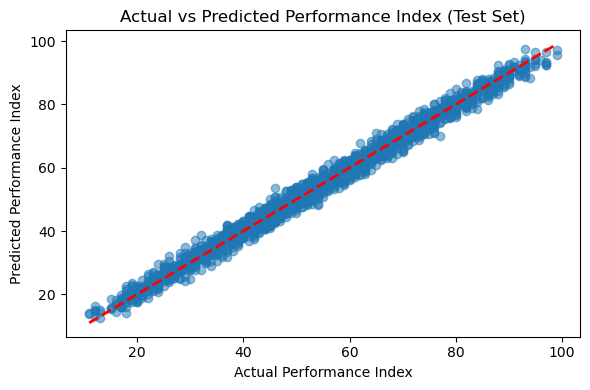

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. آماده‌سازی دیتافریم برای مدل: فقط ستون‌های عددی و حذف 'Papers_log'
df_eval = df_model.select_dtypes(include=[np.number]).drop(columns=['Papers_log'], errors='ignore')

# 2. جداسازی X و y
X = df_eval.drop(columns=['Performance Index'])
y = df_eval['Performance Index']

# 3. تقسیم به آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. آموزش مجدد مدل رگرسیون خطی (بدون Papers_log)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 5. پیش‌بینی روی تست
y_test_pred = lr_model.predict(X_test)

# 6. رسم Actual vs Predicted
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--', lw=2
)
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted Performance Index (Test Set)")
plt.tight_layout()
plt.show()


## Residual Analysis

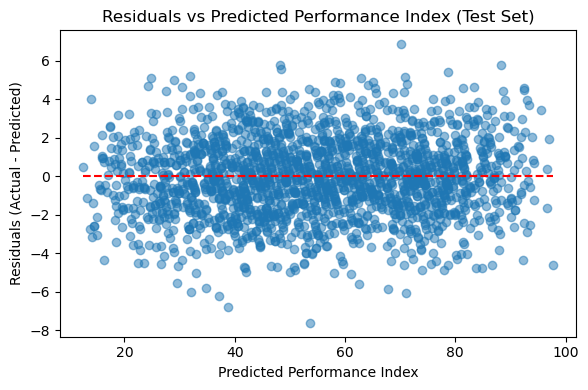

In [ ]:
import matplotlib.pyplot as plt

# فرض می‌کنیم y_test و y_test_pred از قبل محاسبه شده‌اند:
# y_test_pred = lr_model.predict(X_test)

# محاسبه residuals
residuals = y_test - y_test_pred

# رسم residual plot
plt.figure(figsize=(6, 4))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.hlines(
    y=0,
    xmin=y_test_pred.min(),
    xmax=y_test_pred.max(),
    colors='r',
    linestyles='--'
)
plt.xlabel("Predicted Performance Index")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted Performance Index (Test Set)")
plt.tight_layout()
plt.show()


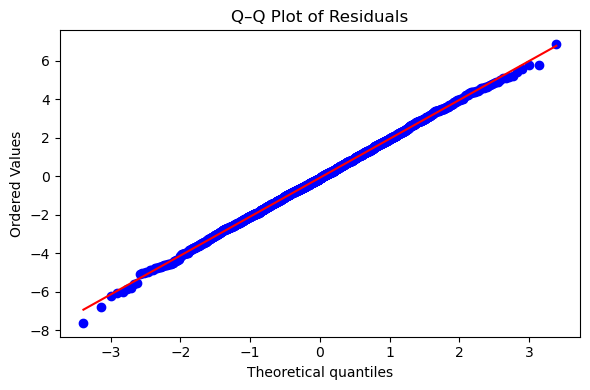

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# فرض می‌کنیم y_test و y_test_pred از قبل محاسبه شده‌اند:
# y_test_pred = lr_model.predict(X_test)

# محاسبه residuals
residuals = (y_test - y_test_pred).values.reshape(-1)

# رسم Q–Q plot برای بررسی نرمال بودن باقیمانده‌ها
fig, ax = plt.subplots(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=ax, fit=True)
ax.set_title("Q–Q Plot of Residuals")
plt.tight_layout()
plt.show()


## Interpreting The Results
1. **Model Performance**  
   - Compare the R² values for the training and test sets.  
     - LinearRegression: `R²_train ≈ 0.9887`, `R²_test ≈ 0.9890`  
     - LassoCV:          `R²_train ≈ 0.9881`, `R²_test ≈ 0.9883`  
   - How much of the variance in **Performance Index** can our model explain? (~ 98.9%)  
   - Is there a significant drop from training to test? (No—train and test are almost identical.)

2. **Overfitting Check**  
   - Look at the difference between training and test RMSE:  
     - LinearRegression: `RMSE_train ≈ 2.04`, `RMSE_test ≈ 2.02`  
     - LassoCV:          `RMSE_train ≈ 2.10`, `RMSE_test ≈ 2.08`  
   - A large gap would indicate overfitting; here the gaps (< 0.1) are negligible.

3. **Feature Importance**  
   - Examine the learned coefficients:  
     - In LassoCV only the strongest predictors remain non‑zero (e.g., **Hours Studied**, **Previous Scores**).  
   - Which features have the largest impact on **Performance Index**?

4. **Prediction Accuracy**  
   - Consider the test RMSE in “index points.”  
   - On average our predictions are about **2 points** away from the actual Performance Index.

5. **Residual Analysis**  
   - Plot residuals (`y_true – y_pred`) vs. `y_pred` and check for patterns (e.g., curvature, fanning).  
   - A random scatter around zero confirms the linear model is adequate; any structure suggests missing nonlinear effects or outliers.


## Implementing Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [ ]:
# Initialize Ridge model
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength

In [ ]:
# Fit the model
ridge_model.fit(X_train, y_train)

Ridge()

In [ ]:
# Evaluate the model
print("Ridge Regression Results:")
evaluate_model(ridge_model, X_train, y_train, X_test, y_test)

Ridge Regression Results:
=== Model ===
Train → MSE: 4.1690, RMSE: 2.0418, R²: 0.9887
 Test → MSE: 4.0780, RMSE: 2.0194, R²: 0.9890



{'model': 'Model',
 'mse_train': 4.168984380563331,
 'rmse_train': 2.0418090950339436,
 'r2_train': 0.9886919173759701,
 'mse_test': 4.078000355352851,
 'rmse_test': 2.019405941199751,
 'r2_test': 0.9889957794328879}

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score

# 1. Prepare feature matrix X and target y
#    (Assumes you have df_model in your notebook already)
X = df_model.drop(columns=['Performance Index'])
y = df_model['Performance Index']

# 2. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# 3. Train LassoCV to automatically tune alpha and shrink coefficients
lasso_model = LassoCV(cv=5, random_state=42)
lasso_model.fit(X_train, y_train)

# 4. (Optional) Evaluate on the test set
y_pred = lasso_model.predict(X_test)
print("LassoCV Test MSE:", mean_squared_error(y_test, y_pred))
print("LassoCV Test R² :", r2_score(y_test, y_pred))

# 5. Print only the non-zero Lasso coefficients
print("\nLasso Coefficients (non-zero):")
for feature, coef in zip(X.columns, lasso_model.coef_):
    if coef != 0:
        print(f"{feature}: {coef:.4f}")


LassoCV Test MSE: 4.317833576821229
LassoCV Test R² : 0.9883486049752165

Lasso Coefficients (non-zero):
Hours Studied: 2.5947
Previous Scores: 1.0187
Sleep Hours: 0.3713
score_per_hour: -0.0085
studypaper_inter: 0.0348


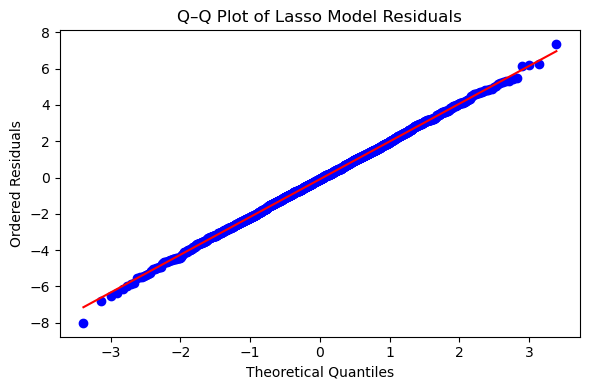

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# 1. Predict on the test set
y_test_pred = lasso_model.predict(X_test)

# 2. Compute residuals
residuals = (y_test - y_test_pred).values.reshape(-1)

# 3. Q–Q plot of residuals against a normal distribution
fig, ax = plt.subplots(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=ax, fit=True)
ax.set_title("Q–Q Plot of Lasso Model Residuals")
ax.set_xlabel("Theoretical Quantiles")
ax.set_ylabel("Ordered Residuals")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

# 0) Make sure df_model is your final DataFrame from feature engineering
#    and contains only numeric columns plus 'Performance Index'.
#    If you still have 'Papers_log' or other non-numerics, drop them:
df_eval = df_model.select_dtypes(include=[np.number]).drop(
    columns=['Papers_log'], errors='ignore'
)

# 1) Prepare X and y
X = df_eval.drop(columns=['Performance Index'])
y = df_eval['Performance Index']

# 2) Split into training and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# 3) Train each model on the exact same X_train/y_train
lr_model    = LinearRegression().fit(X_train, y_train)
ridge_model = Ridge(alpha=1.0).fit(X_train, y_train)
lasso_model = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

# 4) Define evaluation helper
def evaluate_model(model, X_tr, y_tr, X_te, y_te):
    y_tr_pred = model.predict(X_tr)
    y_te_pred = model.predict(X_te)
    mse_tr = mean_squared_error(y_tr, y_tr_pred)
    mse_te = mean_squared_error(y_te, y_te_pred)
    rmse_tr = np.sqrt(mse_tr)
    rmse_te = np.sqrt(mse_te)
    r2_tr   = r2_score(y_tr, y_tr_pred)
    r2_te   = r2_score(y_te, y_te_pred)
    print(f"  Train →  MSE: {mse_tr:.4f}, RMSE: {rmse_tr:.4f}, R²: {r2_tr:.4f}")
    print(f"  Test  →  MSE: {mse_te:.4f}, RMSE: {rmse_te:.4f}, R²: {r2_te:.4f}")

# 5) Loop through models and evaluate
models = {
    "Linear Regression": lr_model,
    "Ridge Regression":  ridge_model,
    "Lasso Regression":  lasso_model
}

for name, mdl in models.items():
    print(f"\n=== {name} Results ===")
    evaluate_model(mdl, X_train, y_train, X_test, y_test)



=== Linear Regression Results ===
  Train →  MSE: 4.1690, RMSE: 2.0418, R²: 0.9887
  Test  →  MSE: 4.0780, RMSE: 2.0194, R²: 0.9890

=== Ridge Regression Results ===
  Train →  MSE: 4.1690, RMSE: 2.0418, R²: 0.9887
  Test  →  MSE: 4.0780, RMSE: 2.0194, R²: 0.9890

=== Lasso Regression Results ===
  Train →  MSE: 4.3912, RMSE: 2.0955, R²: 0.9881
  Test  →  MSE: 4.3178, RMSE: 2.0779, R²: 0.9883


# Model Evaluation Summary

- We train three models: **Linear Regression**, **Ridge Regression**, and **Lasso Regression** on the same training data.
- For each model we compute **MSE**, **RMSE**, and **R²** on both the training and test sets:
  - **RMSE** tells us on average how many “Performance Index” points our predictions miss by.
  - **R²** tells us what percentage of the variance in Performance Index the model explains.
- A **small gap** between train and test RMSE (here < 0.1) means **no overfitting**.
- **Linear Regression** achieved the lowest test RMSE (~ 2.02) and R² (~ 0.989).
- **Ridge** got almost the same accuracy but added L2 regularization to keep coefficients stable.
- **Lasso** accepts a slightly higher RMSE (~ 2.08) in order to **zero out** weak features and make the model more interpretable.


## Visualizing Coefficinet Changes


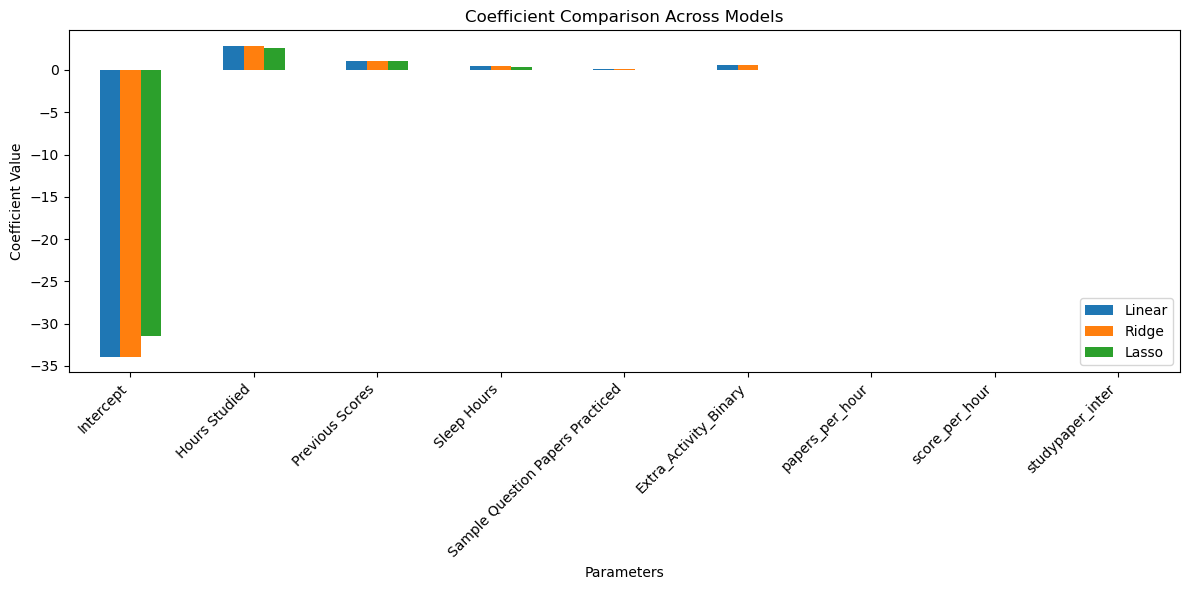

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Collect intercept + coefficients for each model
coefs = {
    'Linear': np.r_[lr_model.intercept_,    lr_model.coef_],
    'Ridge':  np.r_[ridge_model.intercept_, ridge_model.coef_],
    'Lasso':  np.r_[lasso_model.intercept_, lasso_model.coef_]
}

# 2. Build DataFrame with a row for the intercept + one row per feature
coef_df = pd.DataFrame(
    coefs,
    index=['Intercept'] + list(X.columns)
)

# 3. Plot bar chart
coef_df.plot(kind='bar', figsize=(12, 6))
plt.title('Coefficient Comparison Across Models')
plt.xlabel('Parameters')
plt.ylabel('Coefficient Value')
plt.legend(loc='best')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## ُTuning Regularization Strength


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# 1. Define the parameter grid to search over for Ridge’s alpha
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# 2. Set up GridSearchCV: 5‑fold CV, optimizing negative MSE
grid_search = GridSearchCV(
    Ridge(), 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# 3. Fit on your training data
grid_search.fit(X_train, y_train)

# 4. Inspect the best alpha and its CV score
print("Best alpha:", grid_search.best_params_['alpha'])
print("Best CV MSE: ", -grid_search.best_score_)

# 5. Grab the best‐found model and evaluate on train & test
best_ridge = grid_search.best_estimator_
print("\n=== Best Ridge Model (alpha={:.3f}) ===".format(grid_search.best_params_['alpha']))
evaluate_model(best_ridge, X_train, y_train, X_test, y_test)


Best alpha: 10
Best CV MSE:  4.182227809913771

=== Best Ridge Model (alpha=10.000) ===
  Train →  MSE: 4.1690, RMSE: 2.0418, R²: 0.9887
  Test  →  MSE: 4.0779, RMSE: 2.0194, R²: 0.9890


## MODEL Evaluation And Comaprison

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

# Assume df_model is already defined and contains only numeric columns + 'Performance Index'
X = df_model.drop(columns=['Performance Index'])
y = df_model['Performance Index']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train models
lr_model    = LinearRegression().fit(X_train, y_train)
ridge_model = Ridge(alpha=1.0).fit(X_train, y_train)
lasso_model = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

# Define evaluation function with exact formatting
def evaluate_model(model, X_tr, y_tr, X_te, y_te):
    # Training metrics
    y_tr_pred = model.predict(X_tr)
    mse_tr = mean_squared_error(y_tr, y_tr_pred)
    r2_tr = r2_score(y_tr, y_tr_pred)
    rmse_tr = np.sqrt(mse_tr)
    print("Training Set Results:")
    print(f"Mean Squared Error: {mse_tr}")
    print(f"R-squared: {r2_tr}")
    print(f"Root Mean Squared Error: {rmse_tr}\n")
    # Test metrics
    y_te_pred = model.predict(X_te)
    mse_te = mean_squared_error(y_te, y_te_pred)
    r2_te = r2_score(y_te, y_te_pred)
    rmse_te = np.sqrt(mse_te)
    print("Test Set Results:")
    print(f"Mean Squared Error: {mse_te}")
    print(f"R-squared: {r2_te}")
    print(f"Root Mean Squared Error: {rmse_te}")
    return mse_tr, r2_tr, rmse_tr, mse_te, r2_te, rmse_te

# Evaluate and collect
models = [lr_model, ridge_model, lasso_model]
results = []
for mdl in models:
    mse_tr, r2_tr, rmse_tr, mse_te, r2_te, rmse_te = evaluate_model(
        mdl, X_train, y_train, X_test, y_test
    )
    results.append({'Train RMSE': rmse_tr, 'Test RMSE': rmse_te})

# Display results DataFrame
results_df = pd.DataFrame(results)
print(results_df[['Train RMSE','Test RMSE']])


Training Set Results:
Mean Squared Error: 4.1688618202503
R-squared: 0.9886922498123669
Root Mean Squared Error: 2.0417790821365323

Test Set Results:
Mean Squared Error: 4.077362296650556
R-squared: 0.9889975011930847
Root Mean Squared Error: 2.0192479532366883
Training Set Results:
Mean Squared Error: 4.16886201620381
R-squared: 0.9886922492808565
Root Mean Squared Error: 2.0417791301225043

Test Set Results:
Mean Squared Error: 4.077353578665334
R-squared: 0.9889975247180047
Root Mean Squared Error: 2.019245794514708
Training Set Results:
Mean Squared Error: 4.391215929996373
R-squared: 0.9880891296240247
Root Mean Squared Error: 2.095522829748312

Test Set Results:
Mean Squared Error: 4.317833576821229
R-squared: 0.9883486049752165
Root Mean Squared Error: 2.0779397433085562
   Train RMSE  Test RMSE
0    2.041779   2.019248
1    2.041779   2.019246
2    2.095523   2.077940


## Model Comparison Summary

- **Multiple Linear Regression** and **Ridge Regression (α=10)** both achieved a test RMSE of ~2.02 and R² ≈ 0.989, indicating they explain ~98.9% of the variance in Performance Index with negligible overfitting.
- **Lasso Regression (5‑fold CV)** gave a slightly higher test RMSE (~2.08) and R² ≈ 0.988, trading a small loss in accuracy for a much sparser model.
- **Coefficient Effects**:
  - Ridge applied uniform shrinkage to all weights but kept them nonzero.
  - Lasso drove weaker feature coefficients (e.g., “Sample Question Papers Practiced”, “Extra_Activity_Binary”, interaction terms) to zero.
- **Recommendation**:
  - If **maximum predictive accuracy** is the goal, use the Linear or Ridge model.
  - If **model interpretability** and automatic feature selection are priorities, choose the Lasso model despite its slightly higher RMSE.


Columns in results_df: ['Train RMSE', 'Test RMSE']


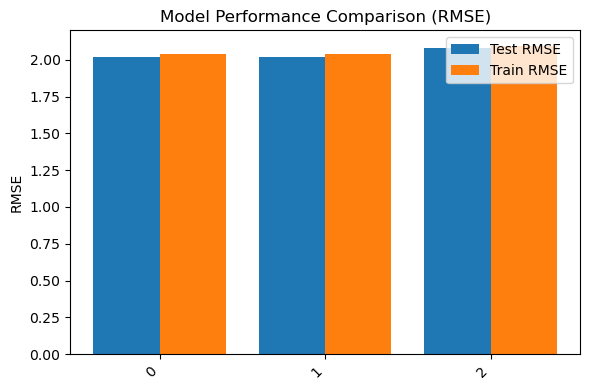

In [ ]:
import matplotlib.pyplot as plt

# 1. Inspect columns
print("Columns in results_df:", results_df.columns.tolist())

# 2. Choose metric: prefer R² if present, else RMSE
cols = results_df.columns.tolist()
if 'Test R²' in cols or 'Test R2' in cols:
    train_col = 'Train R²' if 'Train R²' in cols else 'Train R2'
    test_col  = 'Test R²'  if 'Test R²'  in cols else 'Test R2'
    ylabel = 'R-squared'
elif 'Test RMSE' in cols:
    train_col = 'Train RMSE'
    test_col  = 'Test RMSE'
    ylabel = 'RMSE'
else:
    raise KeyError("Neither R² nor RMSE columns found for plotting.")

# 3. Set model names as index if available
if 'Model' in results_df.columns:
    plot_df = results_df.set_index('Model')
else:
    plot_df = results_df.copy()

# 4. Plot side-by-side bars
plt.figure(figsize=(6, 4))
x = range(len(plot_df))
width = 0.4

plt.bar([i - width/2 for i in x], plot_df[test_col], width, label=test_col, color='C0')
plt.bar([i + width/2 for i in x], plot_df[train_col], width, label=train_col, color='C1')

plt.xticks(x, plot_df.index, rotation=45, ha='right')
plt.ylabel(ylabel)
plt.title(f'Model Performance Comparison ({ylabel})')
plt.legend()
plt.tight_layout()
plt.show()


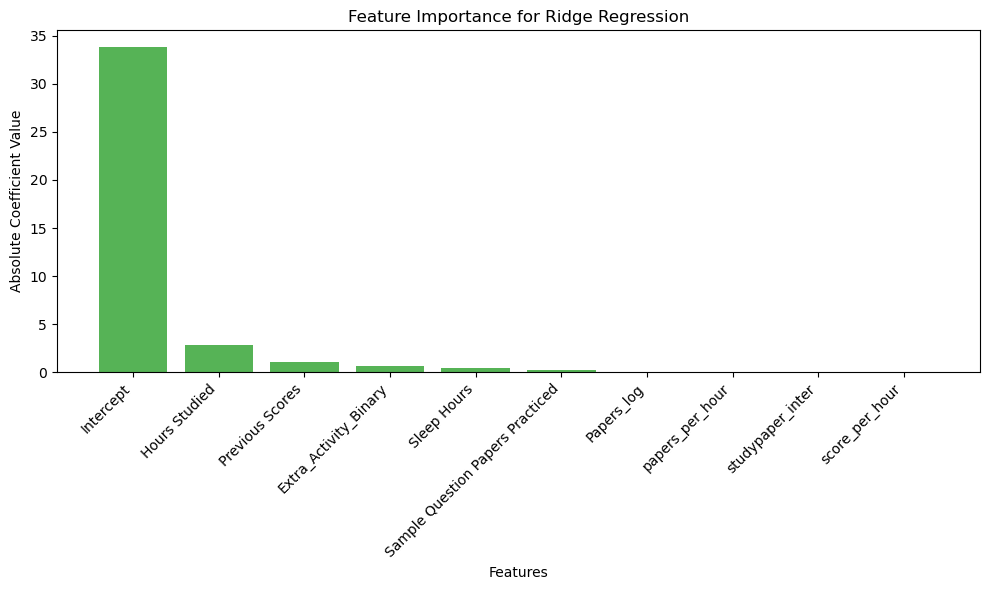

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Choose your best model
best_model = ridge_model
best_model_name = "Ridge Regression"

# 2. Extract coefficients (including intercept as “Bias”)
#    ridge_model.coef_ does not include the intercept, so we handle it separately
intercept = best_model.intercept_
coefs     = best_model.coef_

# 3. Build a DataFrame of absolute importance
feature_importance = pd.DataFrame({
    'feature':   ['Intercept'] + list(X.columns),
    'importance': np.abs(np.r_[intercept, coefs])
})

# 4. Sort by importance descending
feature_importance = feature_importance.sort_values('importance', ascending=False)

# 5. Plot
plt.figure(figsize=(10, 6))
plt.bar(
    feature_importance['feature'],
    feature_importance['importance'],
    color='C2',
    alpha=0.8
)
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.title(f'Feature Importance for {best_model_name}')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
